# WeatherPy

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [164]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [165]:
# create lists
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
record_counter = 0
set_counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# set base url
base_url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

for city in cities:
    url = base_url + city
    response = requests.get(url).json()
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if record_counter == 50:
            record_counter = 1
            set_counter +=1
        else:
            record_counter +=1   
        print(f"Processing Record {record_counter} of Set {set_counter}: {city}")
    except KeyError:
        print("City not found. Skipping...")    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1: san ignacio
Processing Record 2 of Set 1: kenai
Processing Record 3 of Set 1: jamestown
City not found. Skipping...
Processing Record 4 of Set 1: rikitea
Processing Record 5 of Set 1: east london
Processing Record 6 of Set 1: tuktoyaktuk
Processing Record 7 of Set 1: paamiut
Processing Record 8 of Set 1: bethel
Processing Record 9 of Set 1: ganzhou
Processing Record 10 of Set 1: santiago
Processing Record 11 of Set 1: pokhara
Processing Record 12 of Set 1: yellowknife
Processing Record 13 of Set 1: vaini
Processing Record 14 of Set 1: barrow
Processing Record 15 of Set 1: punta arenas
Processing Record 16 of Set 1: qaanaaq
Processing Record 17 of Set 1: rawlins
Processing Record 18 of Set 1: ponta delgada
Processing Record 19 of Set 1: nyurba
Processing Record 20 of Set 1: mahebourg
Processing Record 21 of Set 1: cape town
Processing Record 22 of Set 1: saint-philippe
Proces

Processing Record 43 of Set 4: pacific grove
City not found. Skipping...
City not found. Skipping...
Processing Record 44 of Set 4: eyl
City not found. Skipping...
City not found. Skipping...
Processing Record 45 of Set 4: mweka
Processing Record 46 of Set 4: ekhabi
Processing Record 47 of Set 4: salalah
Processing Record 48 of Set 4: dingle
Processing Record 49 of Set 4: shingu
Processing Record 50 of Set 4: mezen
Processing Record 1 of Set 5: hambantota
Processing Record 2 of Set 5: finschhafen
Processing Record 3 of Set 5: ewa beach
Processing Record 4 of Set 5: saint anthony
Processing Record 5 of Set 5: nome
Processing Record 6 of Set 5: kamogawa
Processing Record 7 of Set 5: penzance
City not found. Skipping...
Processing Record 8 of Set 5: zyryanka
Processing Record 9 of Set 5: charters towers
Processing Record 10 of Set 5: konza
Processing Record 11 of Set 5: igbon
Processing Record 12 of Set 5: williams lake
Processing Record 13 of Set 5: altamira
Processing Record 14 of Set 5

Processing Record 34 of Set 8: caraz
Processing Record 35 of Set 8: oussouye
Processing Record 36 of Set 8: seto
Processing Record 37 of Set 8: beringovskiy
Processing Record 38 of Set 8: porto walter
Processing Record 39 of Set 8: pangai
Processing Record 40 of Set 8: amapa
Processing Record 41 of Set 8: perbaungan
Processing Record 42 of Set 8: douglas
Processing Record 43 of Set 8: west bay
Processing Record 44 of Set 8: nongstoin
Processing Record 45 of Set 8: seoul
Processing Record 46 of Set 8: chumikan
Processing Record 47 of Set 8: nchelenge
Processing Record 48 of Set 8: sinnamary
Processing Record 49 of Set 8: filadelfia
Processing Record 50 of Set 8: namibe
Processing Record 1 of Set 9: popondetta
Processing Record 2 of Set 9: ailigandi
Processing Record 3 of Set 9: yatou
Processing Record 4 of Set 9: daloa
Processing Record 5 of Set 9: chubbuck
City not found. Skipping...
Processing Record 6 of Set 9: xiaoweizhai
Processing Record 7 of Set 9: maxixe
Processing Record 8 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [209]:
# create new df
cities_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list})

# export new data into a .csv file
cities_df.to_csv("../output_data/cities.csv", index=None, header=True)

# display the new dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Ignacio,17.1561,-89.0714,69.01,94,0,1.12,BZ,1612166543
1,Kenai,60.5544,-151.2583,3.99,84,1,3.44,US,1612166543
2,Jamestown,42.0970,-79.2353,26.01,86,90,12.66,US,1612166544
3,Rikitea,-23.1203,-134.9692,79.16,70,41,6.13,PF,1612166544
4,East London,-33.0153,27.9116,62.60,94,75,9.22,ZA,1612166544


## Inspect data and remove cities where the humidity > 100%.

In [210]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.328867,18.810100,50.481779,73.836299,57.375445,8.741157,1.612167e+09
std,33.354671,91.892681,32.486666,20.493768,41.309703,6.295384,8.471347e+01
min,-54.800000,-179.166700,-41.980000,11.000000,0.000000,0.200000,1.612166e+09
25%,-7.559825,-59.321725,26.835000,64.000000,6.000000,4.000000,1.612167e+09
50%,25.152450,24.588900,62.600000,79.000000,75.000000,6.910000,1.612167e+09
75%,50.101475,100.047650,76.335000,88.000000,99.000000,11.890000,1.612167e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,42.260000,1.612167e+09


In [211]:
#  Get the indices of cities that have humidity over 100%.
# for index, row in cities_df.itterows():
#     humid_city = row(["Humidity"] > 99)
    
    
#     print(f"{humid_city} at index {index} has humidity over 100%")
    

In [212]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

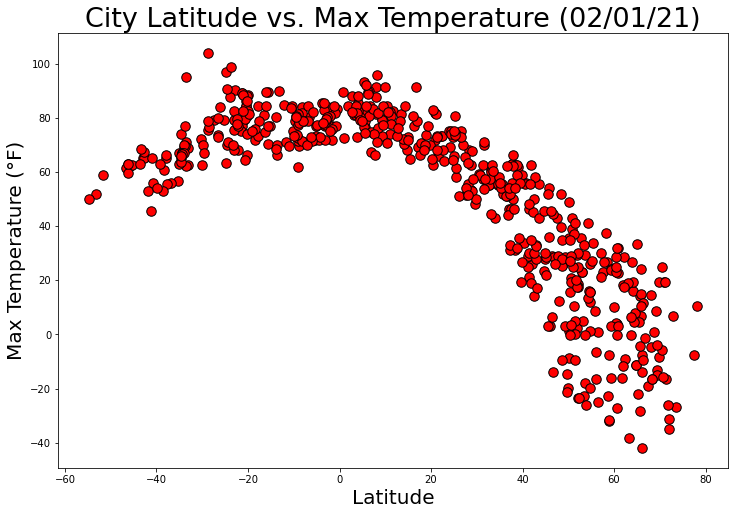

In [213]:
# create a scatter plot to show relationship between lattitude and max temperature
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="o", s=90, c="r", edgecolor="k")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

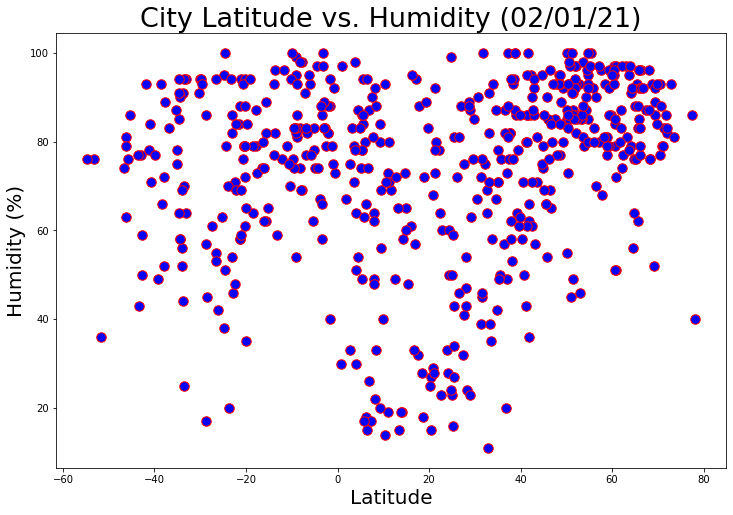

In [214]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="o", s=90, c="b", edgecolor="r")

# add labels for readability
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"City Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

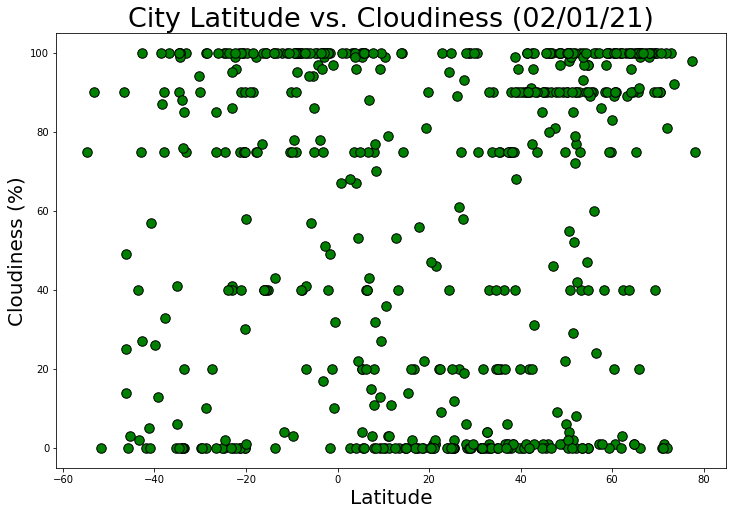

In [215]:
# create a scatter plot to show relationship between lattitude and cloudiness
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker="o", s=90, c="g", edgecolor="k")
plt.title(f"City Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

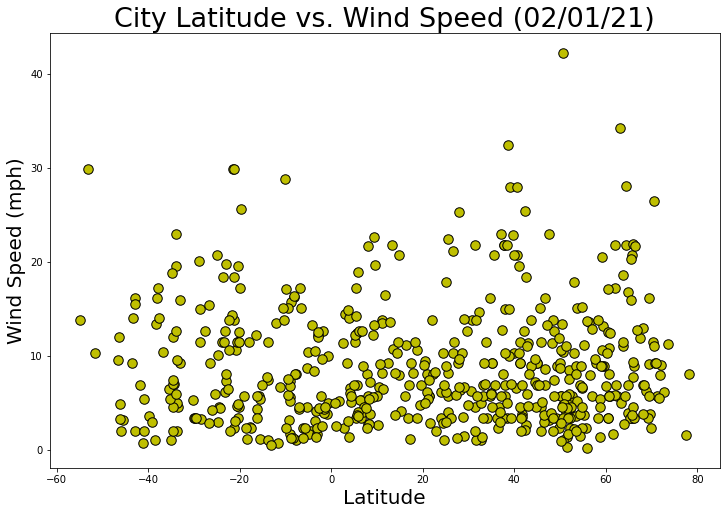

In [216]:
# create a scatter plot to show relationship between lattitude and wind speed
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
fig1, ax1 = plt.subplots(figsize=(12, 8))

# add labels for readability
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker="o", s=90, c="y", edgecolor="k")
plt.title(f"City Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

# save figure as a .png file
plt.savefig("../output_data/Fig4.png")

plt.show()

## Linear Regression

In [217]:
# create northern and southern hemisphere dataframes
n_hem = cities_df.loc[cities_df["Lat"] >= 0]
s_hem = cities_df.loc[cities_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.885731218639859


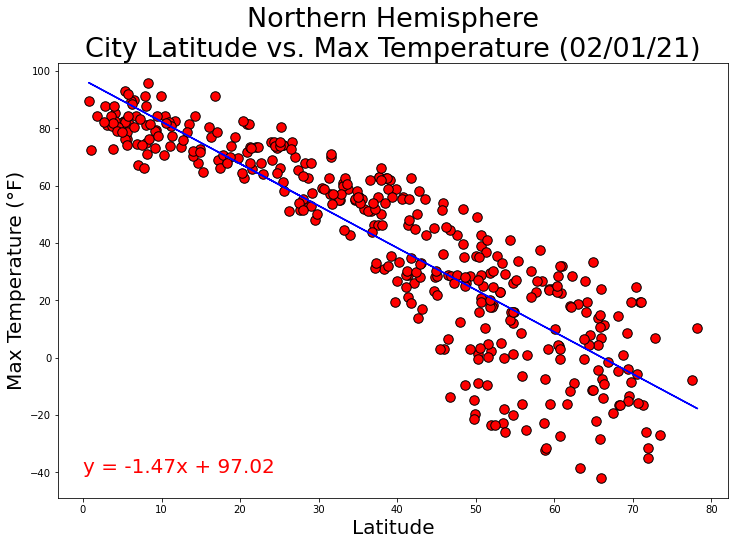

In [218]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "b-")
# print equation in graph
plt.annotate(line_eq, (0,-40), fontsize=20, color="r")

# add labels for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5531400034732754


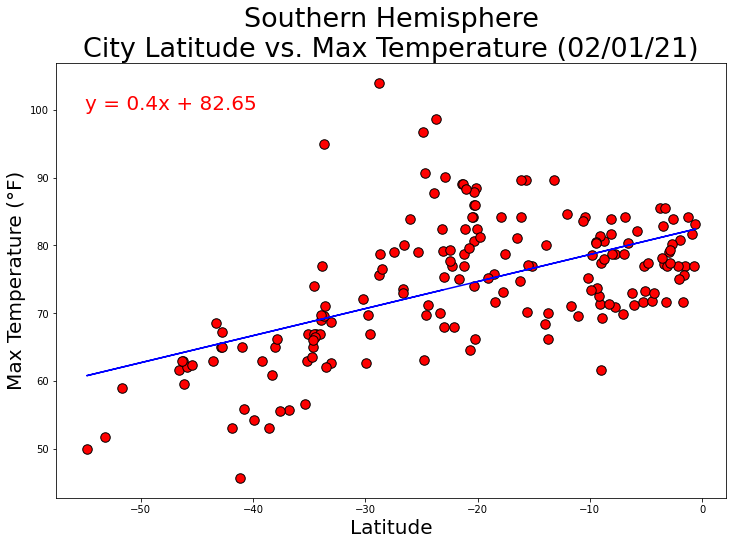

In [219]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="r", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "b-")
# print equation in graph
plt.annotate(line_eq, (-55,100), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Max Temperature ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Max Temperature (°F)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.454646109239721


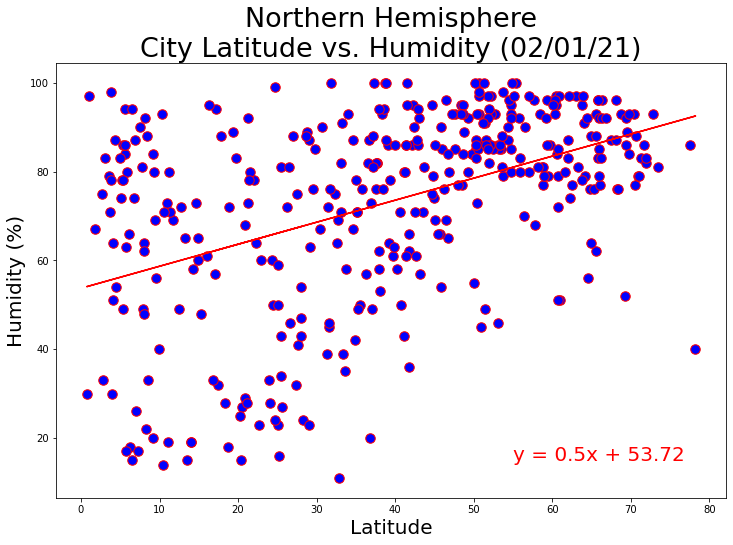

In [220]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (55,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24982930566674116


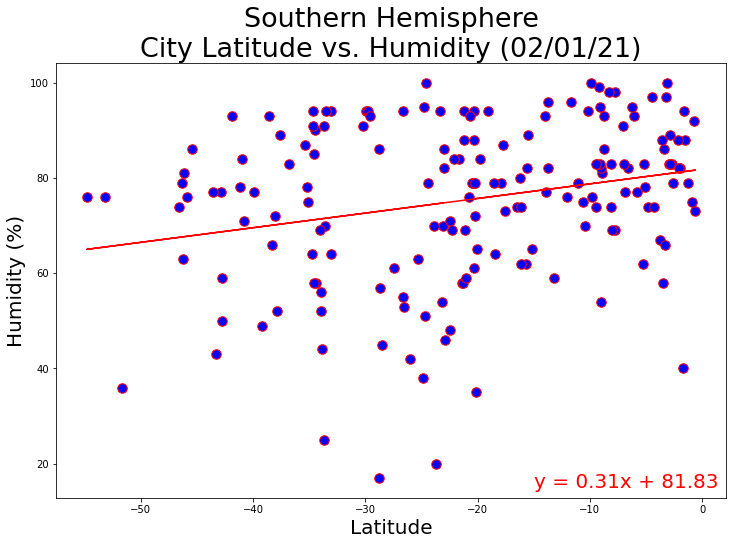

In [221]:
# create a scatter plot to show relationship between lattitude and humidity
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="b", edgecolor="r")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (-15,15), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Humidity ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3119705042341084


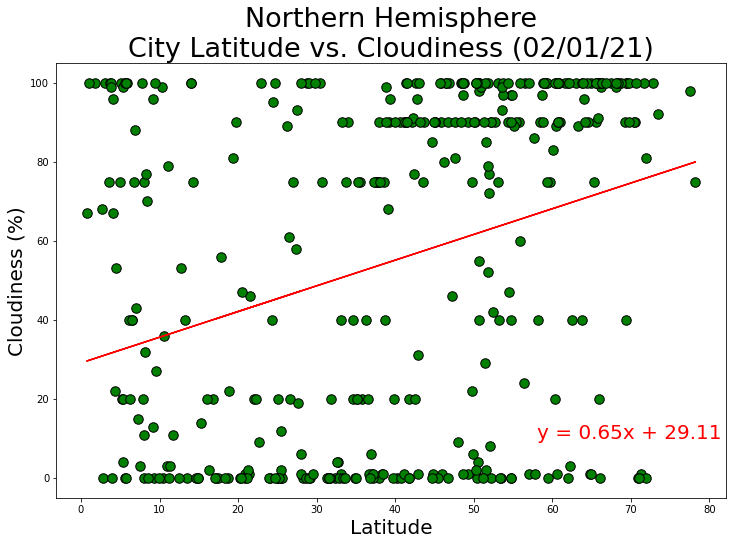

In [222]:
# create a scatter plot to show relationship between lattitude and cloudiness
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (58,10), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.30508015540499483


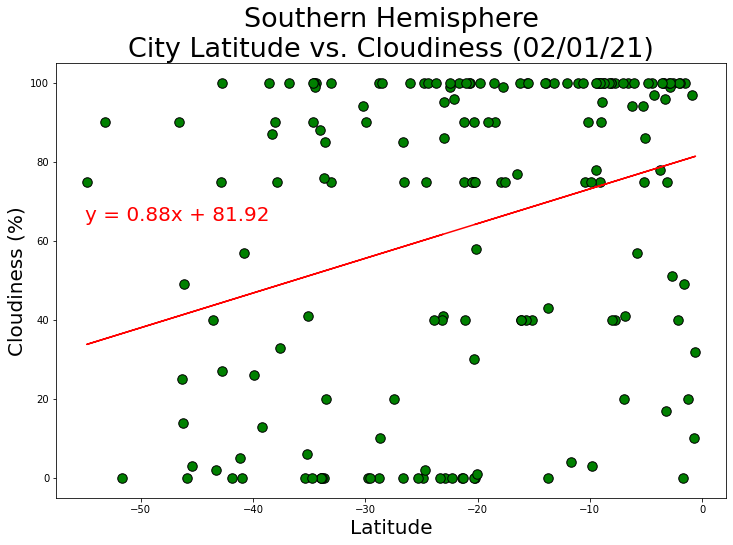

In [223]:
# create a scatter plot to show relationship between lattitude and cloudiness
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="g", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (-55,65), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Cloudiness ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04036444092512585


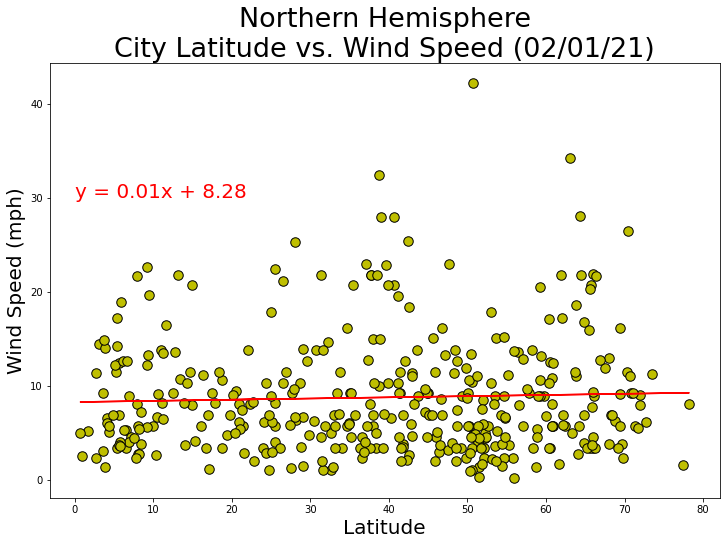

In [224]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = n_hem["Lat"]
y_value = n_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (0,30), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Northern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13351508786990413


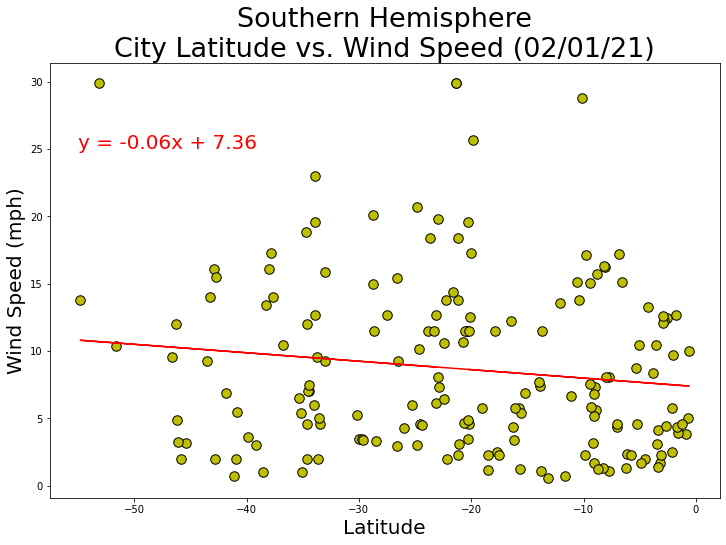

In [225]:
# create a scatter plot to show relationship between lattitude and wind speed in the northern hemisphere
fig1, ax1 = plt.subplots(figsize=(12, 8))
x_value = s_hem["Lat"]
y_value = s_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_value, y_value, s=90, c="y", edgecolor="k")
# plot regression line
plt.plot(x_value, regress_values, "r-")
# print equation in graph
plt.annotate(line_eq, (-55,25), fontsize=20, color="r")

# label graph for readibility
current_date = pd.to_datetime('today').date().strftime('%m/%d/%y')
plt.title(f"Southern Hemisphere\nCity Latitude vs. Wind Speed ({current_date})", fontsize=27)
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=20)

print(f"The r-value is: {rvalue}")

plt.show()